In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

path = "/content/drive/MyDrive/Python Project/"
#features = pd.read_csv(path)

In [4]:
features = pd.read_csv(path+'features.csv')
sales = pd.read_csv(path+'sales.csv')
stores = pd.read_csv(path+'stores.csv')

In [5]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,5/2/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/2/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,5/3/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,5/7/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/7/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [6]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
features['MarkDown1'].fillna(0, inplace=True)
features['MarkDown2'].fillna(0, inplace=True)
features['MarkDown3'].fillna(0, inplace=True)
features['MarkDown4'].fillna(0, inplace=True)
features['MarkDown5'].fillna(0, inplace=True)
features['CPI'].fillna(int(features['CPI'].mean()), inplace=True)
features['Unemployment'].fillna(int(features['Unemployment'].mean()), inplace=True)

In [8]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [9]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,5/2/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,12/2/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,5/3/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [10]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,5/2/2010,24924.50,False
1,1,1,12/2/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,5/3/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,5/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [12]:
sales.groupby('Store').describe()

Dept                        ... Weekly_Sales                       
         count       mean        std  ...          50%         75%        max
Store                                 ...                                    
1      10244.0  44.391742  29.867247  ...    10289.375  31452.9575  203670.47
2      10238.0  44.483786  29.987498  ...    14333.530  34697.3775  285353.53
3       9036.0  41.038623  29.188272  ...     2804.815   7158.2950  155897.94
4      10272.0  44.522975  29.968940  ...    15116.810  40686.6525  385051.04
5       8999.0  41.285254  29.083196  ...     2582.660   6359.4450   93517.72
6      10211.0  44.443443  30.007975  ...    13637.840  32601.9050  342578.65
7       9762.0  44.343167  30.194595  ...     4575.240  11676.0350  222921.09
8       9895.0  43.680344  29.844571  ...     7164.160  19082.3200  153431.69
9       8867.0  40.069020  28.565666  ...     4205.470  11633.4800  139427.43
10     10315.0  44.033931  29.349578  ...    13941.430  38970.7200  693099.36
11     10062.0  44.564003  30.213862  ...    12322.110  27110.7250  245767.47
12      9705.0  43.462030  29.846630  ...     8141.620  20478.9400  360140.66
13     10474.0  44.624021  29.674113  ...    14018.455  36374.9775  292165.78
14     10040.0  44.029183  29.726228  ...    15208.805  36073.0000  474330.10
15      9901.0  44.024442  29.999145  ...     4798.870  11927.3400  292555.25
16      9443.0  42.655936  29.730358  ...     4134.910  10322.2900  129372.97
17      9864.0  43.590126  29.562856  ...     6758.145  17007.9900  194660.52
18      9859.0  43.492849  29.621951  ...     9282.020  20782.8750  353008.64
19     10148.0  44.921561  29.998061  ...    12410.055  25480.6800  339846.03
20     10214.0  44.097611  29.444961  ...    16249.780  39377.6925  422306.25
21      9582.0  43.003131  29.653980  ...     6703.750  15985.5525  244640.55
22      9688.0  43.639657  29.844577  ...     8270.225  19952.7850  393705.20
23     10050.0  43.952239  29.706702  ...    11993.015  29796.1525  369830.98
24     10228.0  44.461967  30.006906  ...    10532.430  25848.2575  233371.62
25      9804.0  43.570175  29.506431  ...     5539.170  12581.3875  198719.71
26      9854.0  44.277654  30.463879  ...     7083.465  18271.9275  196615.87
27     10225.0  44.467971  30.033953  ...    13625.950  34441.3200  420586.57
28     10113.0  44.464748  30.174731  ...    10941.930  24601.1900  355356.39
29      9455.0  43.182232  29.903998  ...     4712.540  10464.7600  266480.63
30      7156.0  47.059251  34.129660  ...     1047.950  12148.2150   80457.01
31     10142.0  44.551075  30.233990  ...     8511.325  24566.1075  274558.07
32     10202.0  44.500196  30.049723  ...     7584.315  19859.4325  220379.93
33      6487.0  46.674888  34.658947  ...      912.810   7654.6750   49129.77
34     10224.0  44.745892  29.985832  ...     6680.565  18208.5075  161262.15
35      9528.0  43.504408  29.753587  ...     9211.620  18664.9050  649770.18
36      6222.0  47.166988  34.985853  ...     1903.285  12341.5300   78974.83
37      7206.0  46.892867  34.082476  ...     1722.900  15616.4275   99514.86
38      7362.0  46.247080  33.839311  ...      751.255  10152.9000  100618.04
39      9878.0  44.730006  30.398542  ...    11016.425  28591.5675  351553.98
40     10017.0  44.760307  30.131271  ...     6989.990  18604.6300  145504.24
41     10088.0  44.828410  30.140423  ...     8927.475  22995.4975  290809.17
42      6953.0  47.018553  34.063094  ...     1293.800  15706.4700  112152.35
43      6751.0  47.096726  34.458159  ...     1732.530  18428.6300  108517.42
44      7169.0  46.740271  34.156804  ...      799.530   6846.2600   66629.98
45      9637.0  43.388918  29.941132  ...     6019.300  15076.5100  240758.86

[45 rows x 16 columns]

In [13]:
sales['Weekly_Sales'].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

In [14]:
sales.groupby(['Dept','Store']).size()

Dept  Store
1     1        143
      2        143
      3        143
      4        143
      5        143
              ... 
99    39        41
      40        36
      41        43
      43         4
      44         2
Length: 3331, dtype: int64

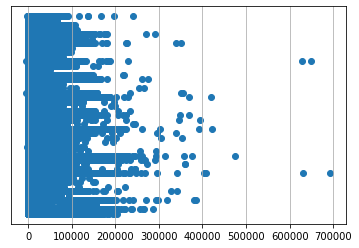

In [15]:
plt.grid(True)
plt.yticks(np.arange(-5000, 700000, 10000)) 
plt.scatter(sales['Weekly_Sales'],sales['Store'])
plt.show()

In [16]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [17]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

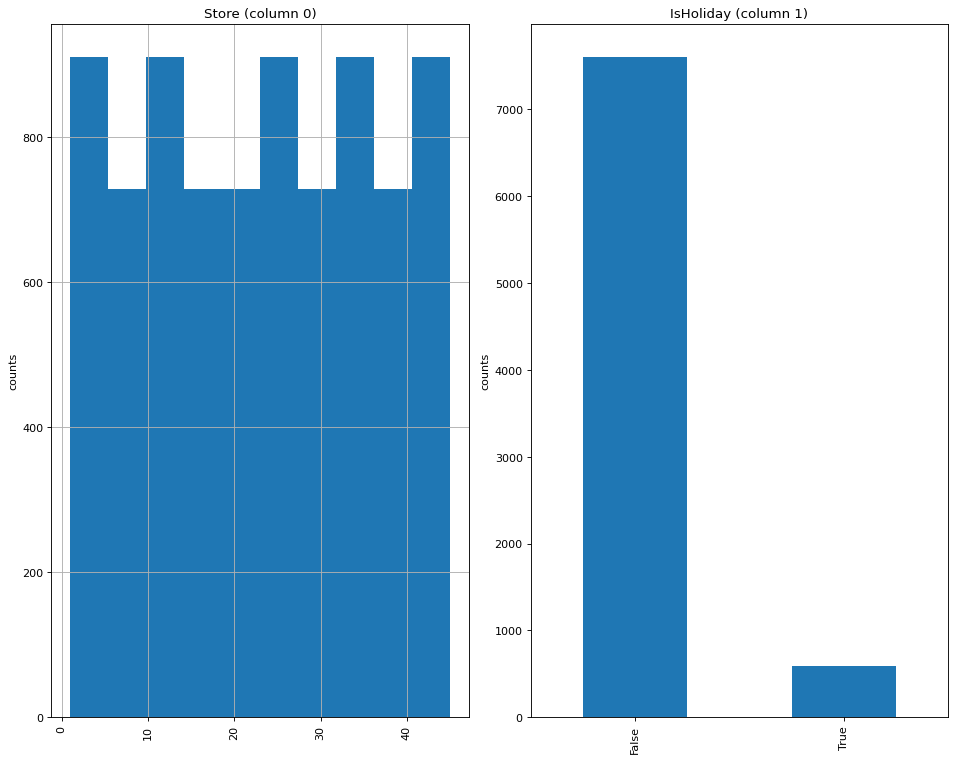

In [18]:
plotPerColumnDistribution(features, 10, 5)

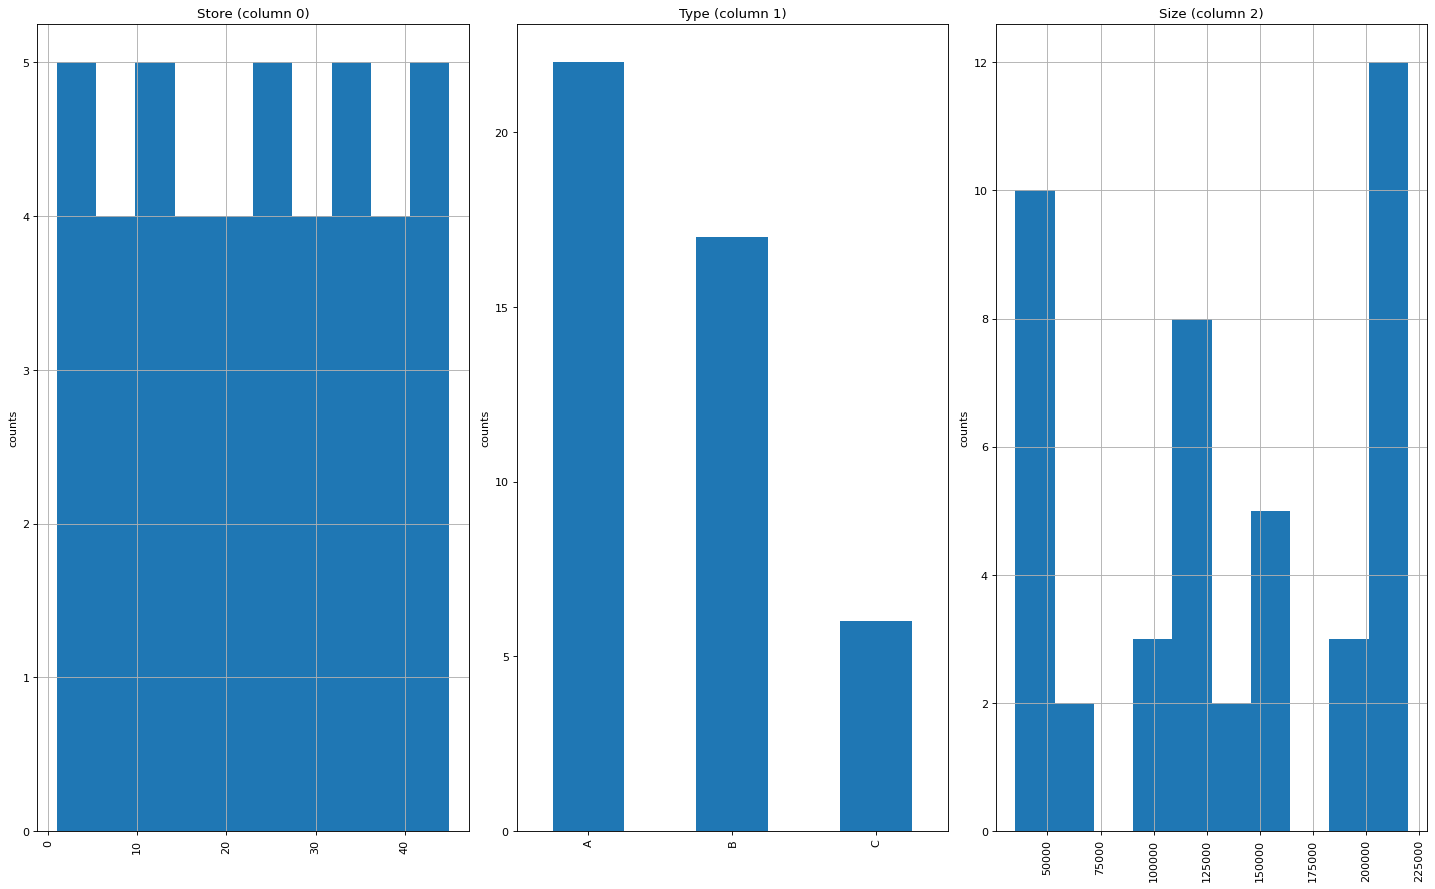

In [27]:
plotPerColumnDistribution(stores, 10, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


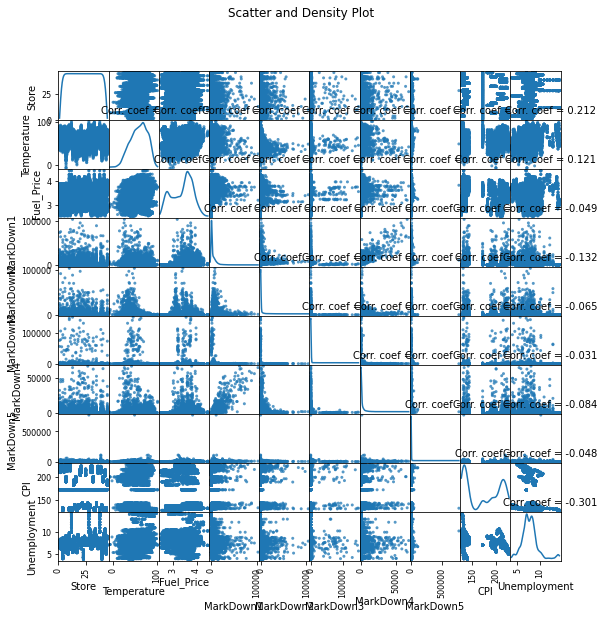

In [19]:
plotScatterMatrix(features, 9, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


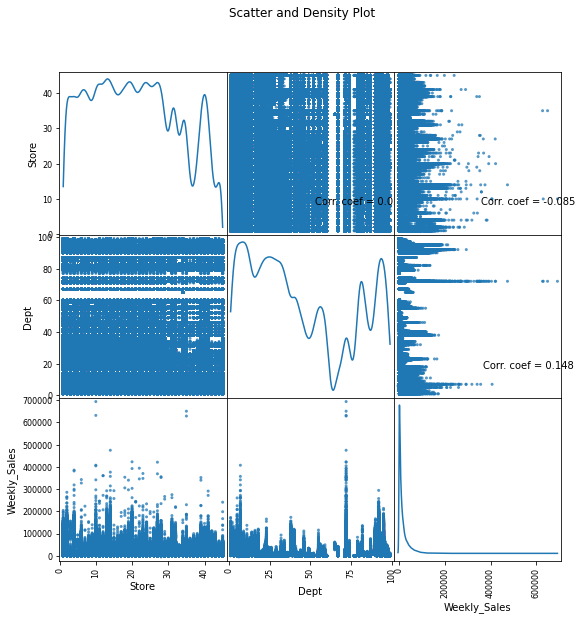

In [20]:
plotScatterMatrix(sales, 9, 10)

In [21]:
join_df = features.merge(sales,on=['Date','Store','IsHoliday'])

In [22]:
join_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50
1,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27
2,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12
3,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04
4,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48


In [23]:
join_df['Date'] = pd.to_datetime(join_df['Date'])
join_df['Year'] = pd.to_datetime(join_df['Date']).dt.year
join_df['Month'] = pd.to_datetime(join_df['Date']).dt.month
join_df['Week'] = pd.to_datetime(join_df['Date']).dt.week
join_df['Day'] = pd.to_datetime(join_df['Date']).dt.day
join_df.replace({'A': 1, 'B': 2,'C':3},inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [24]:
weekly_sales = join_df.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = join_df.loc[join_df['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = join_df.loc[join_df['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = join_df.loc[join_df['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
plt.figure(figsize=(20, 7))
sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()

NameError: ignored

<Figure size 1440x504 with 0 Axes>

In [ ]:
plt.boxplot(sales['Weekly_Sales'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Weekly_Sales')

In [ ]:
sales.isnull().sum()

In [ ]:
stores.head()

In [ ]:
stores.isnull().sum()

In [ ]:
import seaborn as sns
sns.heatmap(features.corr(), annot = True, fmt=".2f")

In [ ]:
d = sales.groupby(['Store','Dept']).sum().reset_index()

In [ ]:
d

In [ ]:
dd = sales.groupby(['Store','Date']).sum().reset_index()

In [ ]:
dd['IsHoliday'].describe()

In [ ]:
for index,rows in dd.iterrows():
    hol=rows.get("IsHoliday")
    if hol>0:
        dd.loc[index,"IsHoliday"]=1
dd